In [1]:
# pip install pyzx
# pip install schemdraw


In [2]:
import pyzx

qubit_amount = 5
gate_count = 8

# Generate a random circuit of Clifford+T gates
circuit = pyzx.generate.cliffordT(qubit_amount, gate_count)

# Draw the circuit (works well in a Jupyter environment)
pyzx.draw(circuit)

# You can also simplify the circuit and then draw the result
# pyzx.simplify.full_reduce(circuit)
# pyzx.draw(circuit)

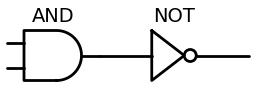

In [3]:
import schemdraw
import schemdraw.logic as logic

with schemdraw.Drawing() as d:
    d += logic.And().label('AND')
    d += logic.Not().right().label('NOT')
    d.draw()


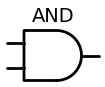

In [4]:
logic.And().label('AND')

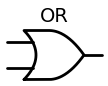

In [5]:
logic.Or().label('OR')

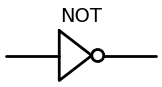

In [6]:
logic.Not().label('NOT')

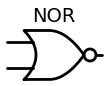

In [60]:
logic.Nor().label('NOR')

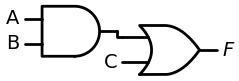

In [7]:
from schemdraw.parsing import logicparse

# Draws the circuit for F = (A and B) or C
with logicparse('(A and B) or C', outlabel='$F$') as d:
    # d.draw() or d.save('boolean_circuit.svg')
    pass

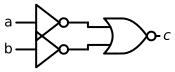

In [59]:
from schemdraw.parsing import logicparse
d = logicparse('not (not a or not b)', outlabel='$c$')
d

In [20]:
def circuit(A: bool, B: bool) -> bool:
    return not (not A or not B)

import pandas as pd
import itertools

def logic_table():
    rows = []
    for A, B in itertools.product([0, 1], repeat=2):
        D = circuit(bool(A), bool(B))
        rows.append({
            "A": A,
            "B": B,
            "D": int(D)
        })
    return pd.DataFrame(rows)

df = logic_table()
df

,A,B,D
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1
